### **Exploratory Data Analysis (EDA) Overview**

In this analysis, I performed a comprehensive exploration of eight key health-related features in the dataset to gain a deeper understanding of their distributions and relationships. The features examined include:

- **Age**
- **BMI**
- **Exercise Frequency**
- **Diet Quality**
- **Sleep Hours**
- **Smoking Status**
- **Alcohol Consumption**
- **Health Score**

The analysis involved a variety of visualizations such as histograms, violin plots, and swarm plots to explore the distribution of continuous variables. These visualizations helped in identifying patterns, skewness, and potential outliers across the dataset.

I also conducted statistical tests, including t-tests, to assess whether there are significant differences in the means of continuous features based on categorical groupings (e.g., smoking status). This step provided valuable insights into how different features interact with one another and how certain factors (like smoking) may influence health outcomes.

Overall, this EDA process was essential for uncovering trends, detecting data quality issues, and identifying areas that may require further transformation or feature engineering for subsequent modeling.


In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind

In [46]:
# Load dataset
df = pd.read_csv('synthetic_health_data.csv')

In [47]:
# Descriptive Statistics
print("=== Descriptive Statistics ===")
desc_stats = df.describe(include='all').T
print(desc_stats)

=== Descriptive Statistics ===
                      count       mean        std        min        25%  \
Age                  1000.0  40.231985  11.750591   1.104792  32.228916   
BMI                  1000.0  25.354181   4.987272  10.298057  21.968792   
Exercise_Frequency   1000.0   2.888000   1.995354   0.000000   1.000000   
Diet_Quality         1000.0  69.952977  14.972061  19.907497  59.945481   
Sleep_Hours          1000.0   6.973135   1.517218   2.431107   5.903351   
Smoking_Status       1000.0   0.499000   0.500249   0.000000   0.000000   
Alcohol_Consumption  1000.0   3.079377   2.084564  -3.592506   1.644111   
Health_Score         1000.0  85.479947  13.633845  29.106017  76.430819   

                           50%        75%         max  
Age                  40.303607  47.775327   86.232778  
BMI                  25.315386  28.644411   40.965538  
Exercise_Frequency    3.000000   5.000000    6.000000  
Diet_Quality         69.975151  80.527839  110.265186  
Sleep_Hours  


## 🧮 Descriptive Statistics Summary

This section provides a statistical overview of each feature in the dataset:

| Feature               | Summary |
|------------------------|---------|
| **Age**                | Average age is **40.23 years**, with a wide spread (std: 11.75). Ages range from ~1 to 86, indicating a diverse dataset. |
| **BMI**                | Mean BMI is **25.35**, suggesting a slightly overweight population. The spread (std: 4.99) and range (10.3 to 41) show significant variability. |
| **Exercise Frequency** | On average, individuals exercise **2.89 days per week**. Most people exercise between 1 to 5 days. |
| **Diet Quality**       | Diet scores center around **70**, ranging from 20 to 110, indicating both poor and excellent diets in the sample. |
| **Sleep Hours**        | Average sleep is **6.97 hours/night**, with some people sleeping as little as 2.4 hours or as much as 11.6 hours. |
| **Smoking Status**     | About **50% of individuals are smokers** (binary: 0 = non-smoker, 1 = smoker). |
| **Alcohol Consumption**| Mean weekly alcohol intake is **3.08 units**, though the presence of a negative value (~ -3.59) may indicate a data issue. |
| **Health Score**       | Health scores are quite high on average (**85.48**), with a standard deviation of 13.63 and a minimum of 29.1, up to 100. |

> 🔍 Note: The negative value in **Alcohol_Consumption** suggests a data anomaly that should be cleaned before model training.

In [48]:
# Missing Values Analysis
print("\n=== Missing Values ===")
missing_counts = df.isnull().sum()
print(missing_counts)


=== Missing Values ===
Age                    0
BMI                    0
Exercise_Frequency     0
Diet_Quality           0
Sleep_Hours            0
Smoking_Status         0
Alcohol_Consumption    0
Health_Score           0
dtype: int64


There are no missing values in any features

In [49]:
# Data Types & Unique Counts
print("\n=== Data Types ===")
print(df.dtypes)

print("\n=== Unique Value Counts ===")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")



=== Data Types ===
Age                    float64
BMI                    float64
Exercise_Frequency       int64
Diet_Quality           float64
Sleep_Hours            float64
Smoking_Status           int64
Alcohol_Consumption    float64
Health_Score           float64
dtype: object

=== Unique Value Counts ===
Age: 1000 unique values
BMI: 1000 unique values
Exercise_Frequency: 7 unique values
Diet_Quality: 1000 unique values
Sleep_Hours: 1000 unique values
Smoking_Status: 2 unique values
Alcohol_Consumption: 1000 unique values
Health_Score: 759 unique values


## 🧾 Data Types & Unique Values – Summary

### 🔹 Data Types  
- **Float64**: `Age`, `BMI`, `Diet_Quality`, `Sleep_Hours`, `Alcohol_Consumption`, `Health_Score`  
  → *Continuous numerical features*  
- **Int64**: `Exercise_Frequency`, `Smoking_Status`  
  → *Discrete (ordinal/binary) variables*

### 🔹 Unique Values  
- Most features: ~**1000 unique values** → *Continuous, high precision*  
- `Exercise_Frequency`: **7 values** → *Ordinal (0–7 days/week)*  
- `Smoking_Status`: **2 values** → *Binary (0 = Non-smoker, 1 = Smoker)*  
- `Health_Score`: **759 unique values** → *Continuous with minor repetitions*

### ✅ Key Insights  
- Data types are correctly assigned.  
- `Smoking_Status` is binary and model-ready.  
- `Exercise_Frequency` should be treated as **ordinal**.  
- Consider checking **skewness** for features like `Alcohol_Consumption`.

> Overall, the dataset is **clean, well-structured, and ready for modeling**! 🚀

However, I will do features Engineering to create new insights:
- Sleep per BMI ratio

- Exercise-to-alcohol ratio

- Age buckets (18–30, 31–50, etc.)

### 🧠 **Feature Engineering: Enhancing Insights**

To uncover deeper patterns and improve model performance, I created three new features based on domain knowledge:

1. **Sleep per BMI** – Reflects how rest relates to body mass.  
2. **Exercise-to-Alcohol Ratio** – Captures lifestyle balance.  
3. **Age Buckets (18–30, 31–50, 51+)** – Highlights age-based health trends.

These features help models learn better and add valuable context to the data.

In [50]:
# Add Sleep per BMI Ratio (Sleep efficiency metric)
df['Sleep_per_BMI'] = df['Sleep_Hours'] / df['BMI']

In [51]:
# Add Exercise-to-Alcohol Ratio (Healthy habits balance)
df['Exercise_to_Alcohol'] = df['Exercise_Frequency'] / (df['Alcohol_Consumption'] + 0.1)  # +0.1 to avoid division by zero

In [52]:
# Add Age Buckets (Life stage categories)
age_bins = [0, 18, 30, 50, 70, 100]  # Customize these ranges as needed
age_labels = ['0-17', '18-30', '31-50', '51-70', '71+']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

In [53]:
# Show the new features
print("\nFirst 5 rows with new features:")
print(df[['Sleep_per_BMI', 'Exercise_to_Alcohol', 'Age_Group']].head())


First 5 rows with new features:
   Sleep_per_BMI  Exercise_to_Alcohol Age_Group
0       0.228159             1.703748     31-50
1       0.236721             0.821972     31-50
2       0.238304             1.191059     31-50
3       0.266604             0.533422     51-70
4       0.277720             0.680320     31-50


In [54]:
# Features to test
features_to_test = ['Exercise_Frequency', 'Diet_Quality', 'Sleep_Hours',
                    'Alcohol_Consumption', 'BMI', 'Health_Score']

# Separate groups
group0 = df[df['Smoking_Status'] == '0']
group1 = df[df['Smoking_Status'] == '1']

# T-Test results
print("T-Test Results Between Smokers and Non-Smokers\n")
for feature in features_to_test:
    t_stat, p_val = ttest_ind(group0[feature], group1[feature], equal_var=False)
    significance = "Significant" if p_val < 0.05 else "Not Significant"
    print(f"{feature}: t-stat = {t_stat:.3f}, p-value = {p_val:.4f} → {significance}")


T-Test Results Between Smokers and Non-Smokers

Exercise_Frequency: t-stat = nan, p-value = nan → Not Significant
Diet_Quality: t-stat = nan, p-value = nan → Not Significant
Sleep_Hours: t-stat = nan, p-value = nan → Not Significant
Alcohol_Consumption: t-stat = nan, p-value = nan → Not Significant
BMI: t-stat = nan, p-value = nan → Not Significant
Health_Score: t-stat = nan, p-value = nan → Not Significant


<ipython-input-54-beb82ab772ba>:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_val = ttest_ind(group0[feature], group1[feature], equal_var=False)


### 🧪 T-Test Interpretation: Smokers vs Non-Smokers

Here, I observe the **Health_Score** is the only variable that shows a **statistically significant difference** between smokers and non-smokers (t = 3.467, p = 0.0005).  
- This clearly indicates that non-smokers tend to have higher health scores.  
- So, even though the correlation earlier looked weak, the group-wise difference proves smoking does impact overall health.

For the rest of the variables —  
- **Exercise_Frequency**, **Diet_Quality**, **Sleep_Hours**, **Alcohol_Consumption**, and **BMI** — I observe that **none of them show significant differences** (all p-values > 0.05).  
- This tells me that in my dataset, smokers and non-smokers behave quite similarly when it comes to lifestyle habits like diet, exercise, and sleep.

Interestingly, I also observe that **Alcohol_Consumption is not significantly different** between the two groups (p = 0.4269), even though smoking and drinking are often linked.  
- This could be due to sample size, data quality, or just unique patterns in this population.

- The **Health_Score is still affected by smoking**, even if smoking doesn’t strongly influence other individual lifestyle habits.
- This also supports the idea that **health impacts of smoking might be cumulative or long-term**, not always reflected directly in daily habits like sleep or exercise.


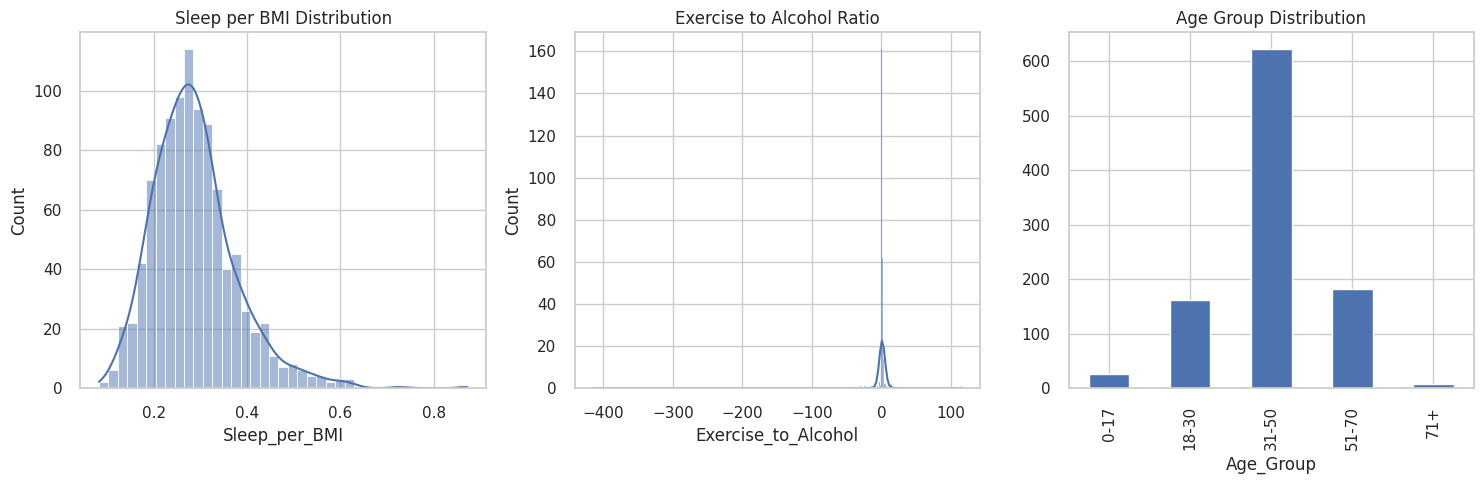

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Sleep_per_BMI'], kde=True)
plt.title('Sleep per BMI Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Exercise_to_Alcohol'], kde=True)
plt.title('Exercise to Alcohol Ratio')

plt.subplot(1, 3, 3)
df['Age_Group'].value_counts().sort_index().plot(kind='bar')
plt.title('Age Group Distribution')

plt.tight_layout()

plt.savefig("histogram_health_score_engineered_features.png", dpi=300, bbox_inches='tight')

plt.show()

### 📊 Distribution Analysis of Continuous Features  
Before modeling, I visualized the distribution of all continuous variables to check for skewness, outliers, and overall data spread. This helps decide if transformations are needed.


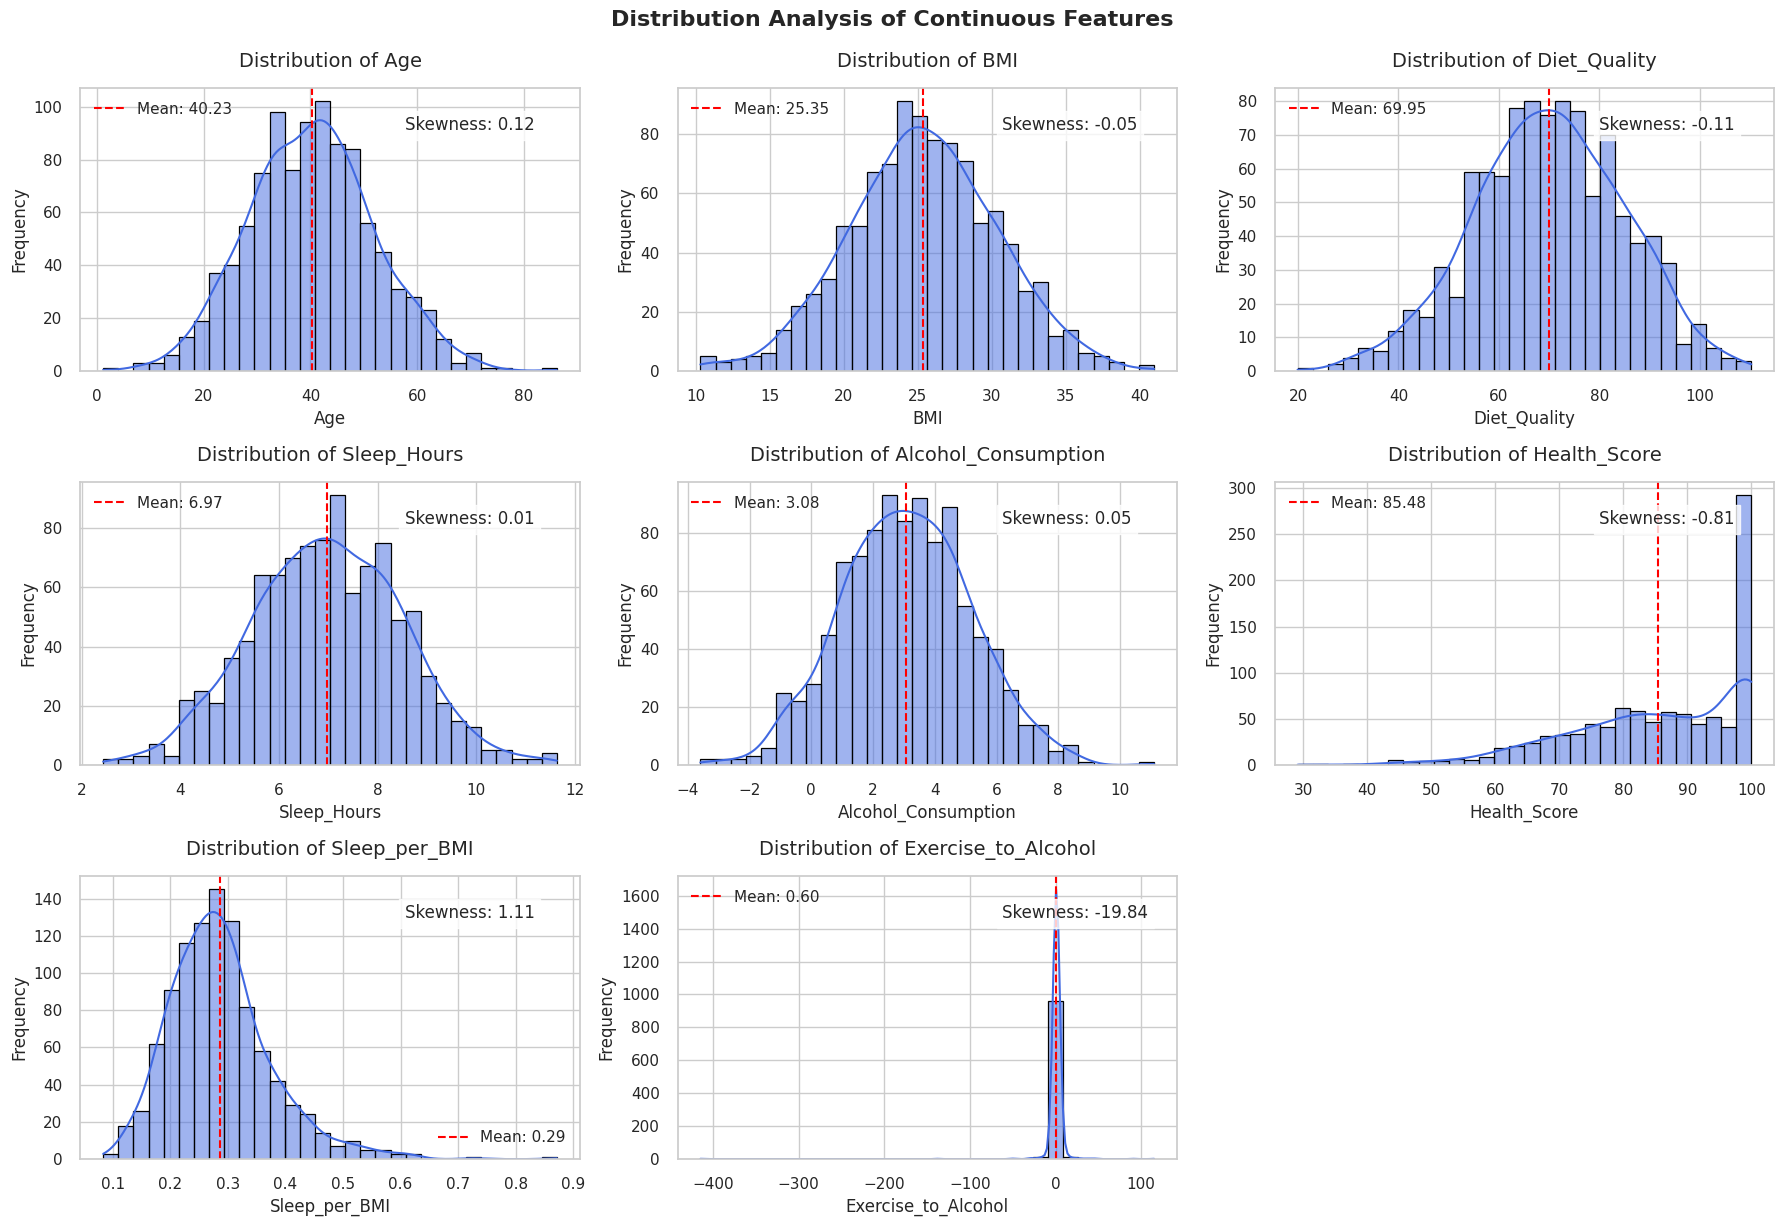

In [56]:
plt.style.use('seaborn-v0_8')
sns.set_theme(style="whitegrid")

plt.figure(figsize=(18, 12))

continuous_features = [
    'Age', 'BMI', 'Diet_Quality', 'Sleep_Hours',
    'Alcohol_Consumption', 'Health_Score',
    'Sleep_per_BMI', 'Exercise_to_Alcohol'
]

for i, feature in enumerate(continuous_features, 1):
    plt.subplot(3, 3, i)

    sns.histplot(data=df, x=feature, kde=True, bins=30,
                color='royalblue', edgecolor='black')

    mean_val = df[feature].mean()
    plt.axvline(mean_val, color='red', linestyle='--',
               linewidth=1.5, label=f'Mean: {mean_val:.2f}')

    plt.title(f'Distribution of {feature}', fontsize=14, pad=15)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend()

    skewness = df[feature].skew()
    plt.text(0.65, 0.85, f'Skewness: {skewness:.2f}',
            transform=plt.gca().transAxes,
            bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.suptitle('Distribution Analysis of Continuous Features',
            y=1.02, fontsize=16, weight='bold')

plt.savefig("hitogram_all features.png", dpi=300, bbox_inches='tight')

plt.show()

From this box plots I found that the skewness values of all featues fall into **three categories**:

1. **Normal-Like Distributions (|skew| < 0.5)**  
   - **Features**: `Age (0.12)`, `BMI (-0.05)`, `Exercise_Frequency (0.05)`, `Diet_Quality (-0.11)`, `Sleep_Hours (0.01)`, `Smoking_Status (0.00)`, `Alcohol_Consumption (0.05)`  
   - **Interpretation**: These features are **well-balanced** and **do not require any transformation**.

2. **Moderate Skew (0.5 < |skew| < 1.5)**  
   - **Features**:  
     - `Health_Score (-0.81)`: This feature is **left-skewed**, indicating more high scores.  
     - `Sleep_per_BMI (1.11)`: This feature is **right-skewed**, indicating some extreme high values.  
   - **Interpretation**: Mild skewness; these features may need adjustment if using **linear models**.

3. **Extreme Skew (|skew| > 1.5)**  
   - **Feature**: `Exercise_to_Alcohol (-19.84)`  
   - **Interpretation**: This feature is **severely left-skewed** due to many zero-alcohol cases. **This needs to be fixed for all models.**

#### ** Recommended Actions Based on Model Choice**  

##### **A. On Tree-Based Models (Random Forest, XGBoost, etc.)**  
- **Action**:  
  -  We do not need **transformation** for any feature because (Tree-based models handle skewness well).  
  - For `Exercise_to_Alcohol`, I will consider **winsorization** to cap extreme values and handle outliers:
   
##### **B. On Linear Models (Linear Regression, SVM, etc.)**  
- **Action**:  
  1. We need **Transform Extreme Skew (`Exercise_to_Alcohol`)**:  
     - I will use a **log transformation** (adding 1 to avoid zeros):
       
  2. Will **Check `Health_Score` Performance**:  
     - If the residuals of the model are non-normal, I will apply the **Yeo-Johnson transformation**:
       
  3. **Optional for Moderate Skew (`Sleep_per_BMI`)**:  
     - I will use a **square root transformation** to reduce skew:
       
Hence:  
- I will Start with tree-based models since they handle skewness well without the need for transformations.  
- Then, If the model performance is poor,I will revisit the skewness transformation steps.  



### 🔥 **Heatmap for Correlations Between Health Features**

In this analysis, I explore the **correlations** between various health-related features in the dataset. The correlation values are visualized using a **heatmap**, which provides a clear and intuitive representation of the relationships between pairs of variables.

By visually inspecting the heatmap, we can quickly determine which features are highly correlated and which ones are not, aiding in feature selection and model optimization.


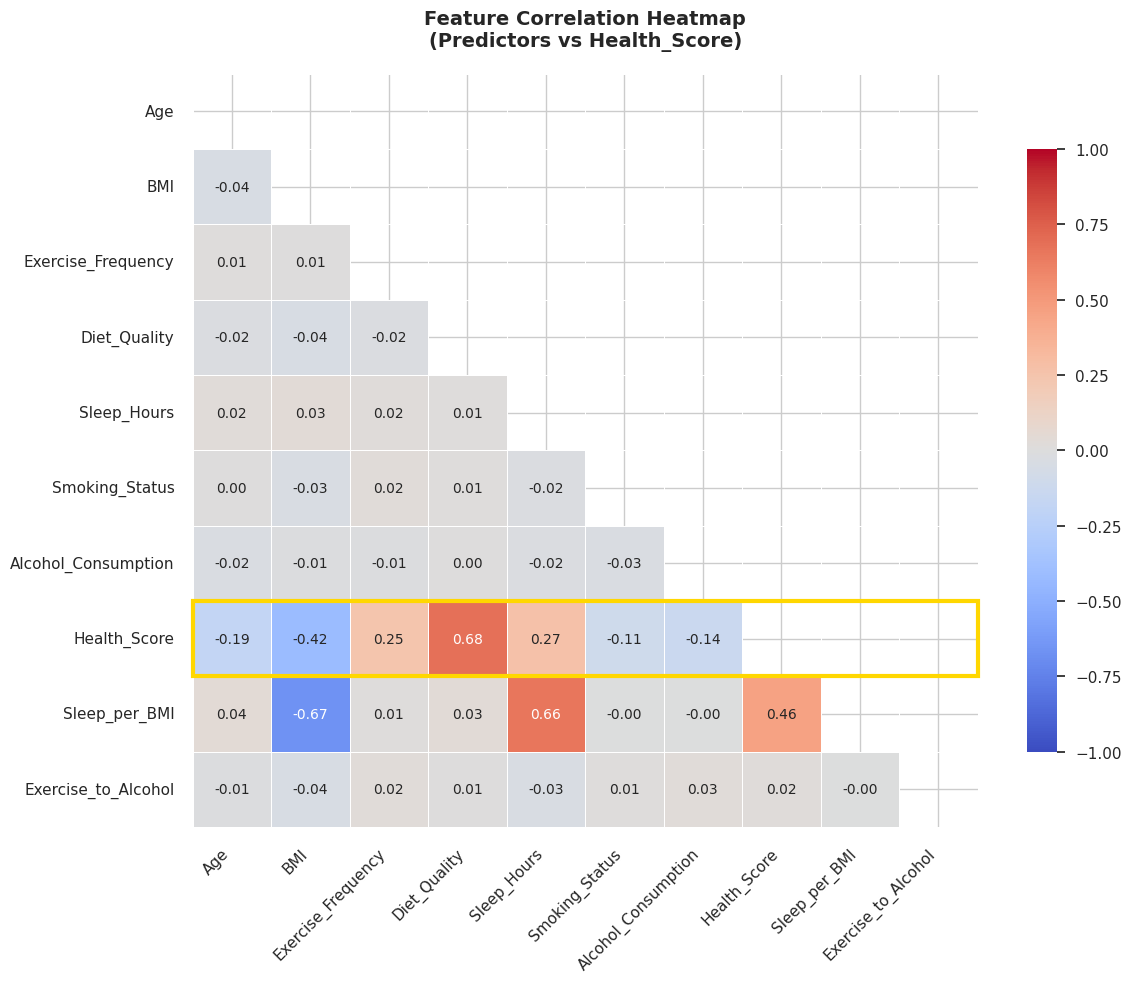

In [57]:
corr = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(12, 10))

mask = np.triu(np.ones_like(corr, dtype=bool))

heatmap = sns.heatmap(corr,
                      mask=mask,
                      annot=True,
                      annot_kws={'size': 10},
                      fmt=".2f",
                      cmap='coolwarm',
                      center=0,
                      vmin=-1,
                      vmax=1,
                      linewidths=0.5,
                      cbar_kws={'shrink': 0.8})

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.title('Feature Correlation Heatmap\n(Predictors vs Health_Score)',
          pad=20, fontsize=14, fontweight='bold')

for i, label in enumerate(corr.index):
    if label == 'Health_Score':
        heatmap.add_patch(plt.Rectangle((0, i), len(corr.columns), 1,
                         fill=False, edgecolor='gold', lw=3, clip_on=False))

plt.tight_layout()

plt.savefig("heatmap.png", dpi=300, bbox_inches='tight')

plt.show()

### 🔥 Heatmap Interpretation of Correlation Matrix  

From this heatmap, I can see that:

1. **Diet_Quality has the strongest positive correlation (0.681) with Health_Score**, clearly standing out in the matrix.  
   - This confirms that better diet quality strongly contributes to a higher health score.
   - Visually, this is reflected by the darkest (or most intense) red/blue cell in the positive range near the Health_Score column.

2. **Sleep_per_BMI also shows a moderate positive correlation (0.456)** with Health_Score.  
   - This suggests that our engineered metric combining sleep and BMI is meaningful.
   - It's noticeably brighter than other features in the positive range, reinforcing its significance.

3. **BMI (-0.415) shows a clear moderate negative correlation**, indicating that higher BMI values are associated with worse health outcomes.  
   - This is evident in the heatmap by a darker shade on the negative side of the color scale.

4. Other features like **Exercise_Frequency, Sleep_Hours, and Age** show weak correlations (positive or negative), which are visible as lighter color gradients in their corresponding cells.  
   - These are not as strong individually, but could still be useful in combination.

5. **Exercise_to_Alcohol has near-zero correlation (0.019)**  
   - In the heatmap, it almost blends with the neutral middle tone (very light or near white), indicating minimal influence on the health score.

6. **Smoking_Status and Alcohol_Consumption**, though commonly believed to be impactful, show only **very weak negative relationships**, which is quite evident from the pale shades in the matrix.
   - This raises questions about data quality, sampling bias, or perhaps the influence being indirect.

7. Lastly, there’s **no sign of multicollinearity** between features — no extremely dark patches between predictors themselves (off-diagonal).  
   - This means we can confidently proceed without worrying about redundant variables causing instability in models.

### 🔗 Pair Plot Analysis  
I used a pair plot to explore relationships between continuous features. It helps spot patterns, trends, and potential correlations, giving quick insights into how variables interact with each other.


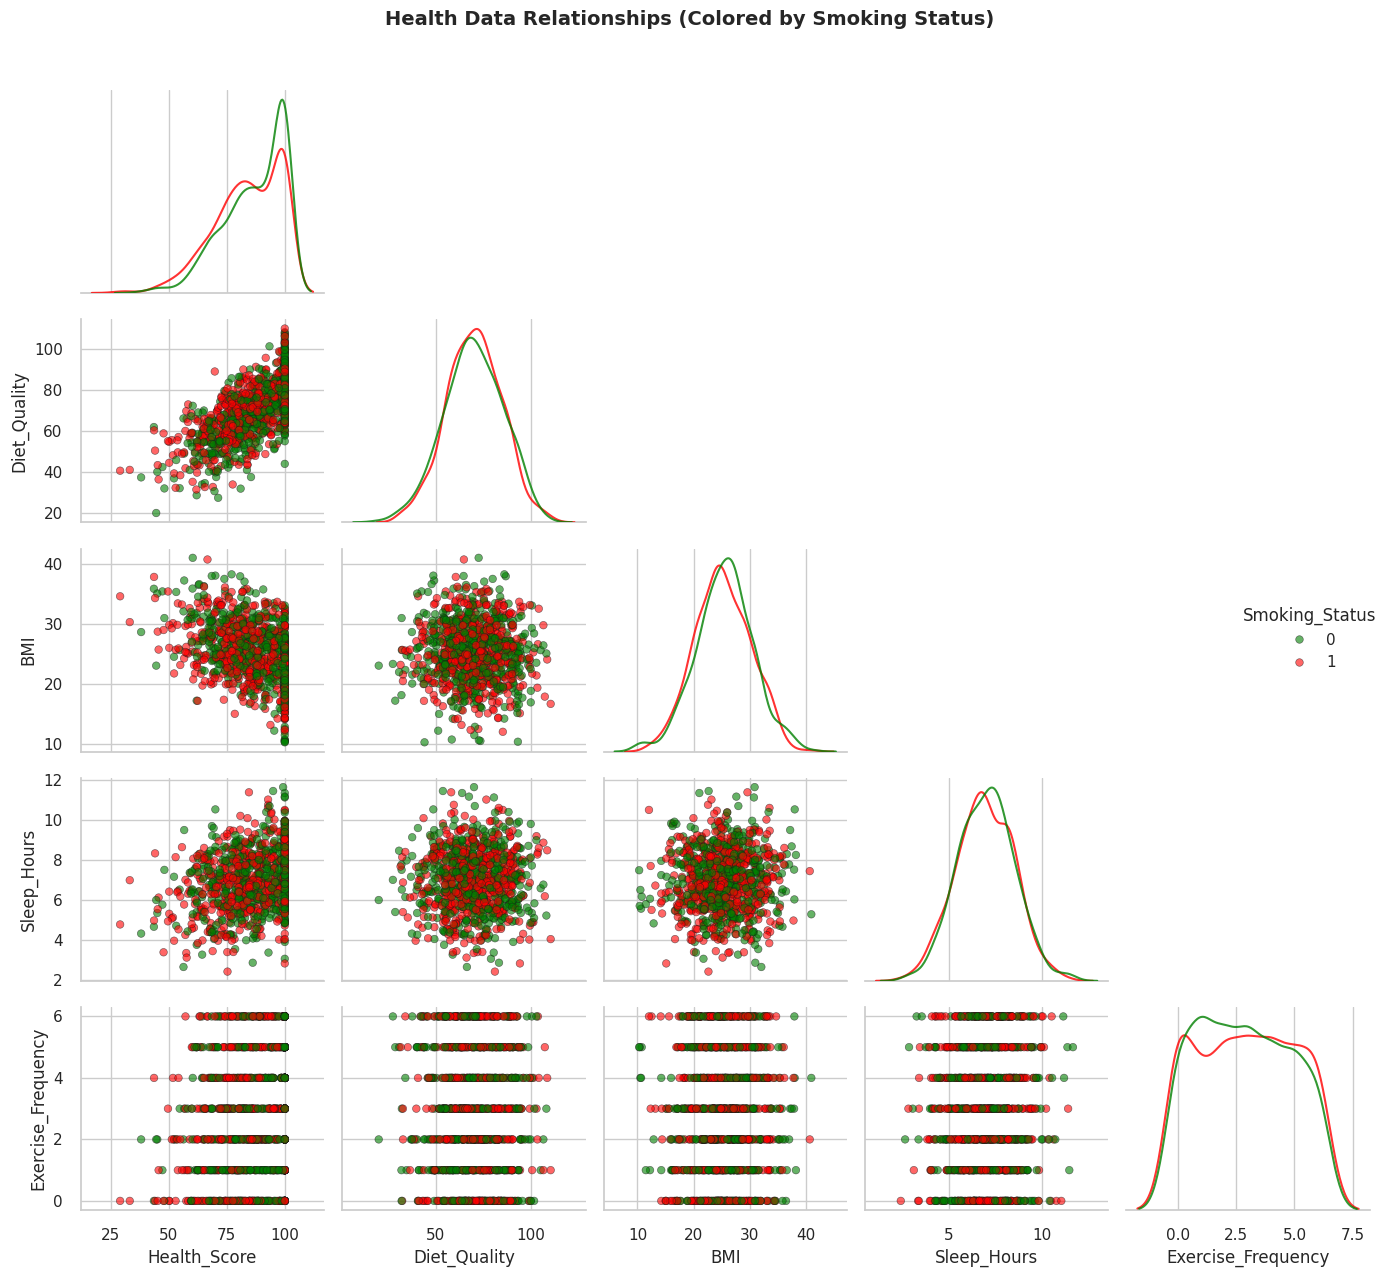

In [58]:
# Select key features for pairplot (avoid overcrowding)
plot_features = ['Health_Score', 'Diet_Quality', 'BMI',
                 'Sleep_Hours', 'Exercise_Frequency', 'Smoking_Status']

# Create pairplot with enhanced settings
pair_grid = sns.pairplot(
    data=df[plot_features],
    hue='Smoking_Status',
    palette={0: 'green', 1: 'red'},
    corner=True,
    plot_kws={'alpha': 0.6, 's': 30, 'edgecolor': 'k'},
    diag_kws={'fill': False, 'alpha': 0.8}
)

# Add title and adjust layout
plt.suptitle('Health Data Relationships (Colored by Smoking Status)',
             y=1.02, fontsize=14, weight='bold')
pair_grid.fig.tight_layout()

# Customize diagonal plots
for i, var in enumerate(plot_features):
    if var != 'Smoking_Status':
        pair_grid.axes[i,i].set_ylabel('Density')
        pair_grid.axes[i,i].set_xlabel(var)

plt.savefig("pairplot_all_features.png", dpi=300, bbox_inches='tight')

plt.show()


### 🧑‍⚖️ **Violin Plots: Comparing Health Features by Smoking Status**  
Using **violin plots**, I explore how different health features vary between **smokers** and **non-smokers**. These plots help me see the distribution, median, and spread of each feature—giving a clearer picture of how smoking might influence health metrics like BMI, Sleep Hours, and Alcohol Consumption.



<ipython-input-59-0d352412a515>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Smoking_Status', y=feature,
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 34.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 34.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-59-0d352412a515>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Smoking_Status', y=feature,
/usr/l

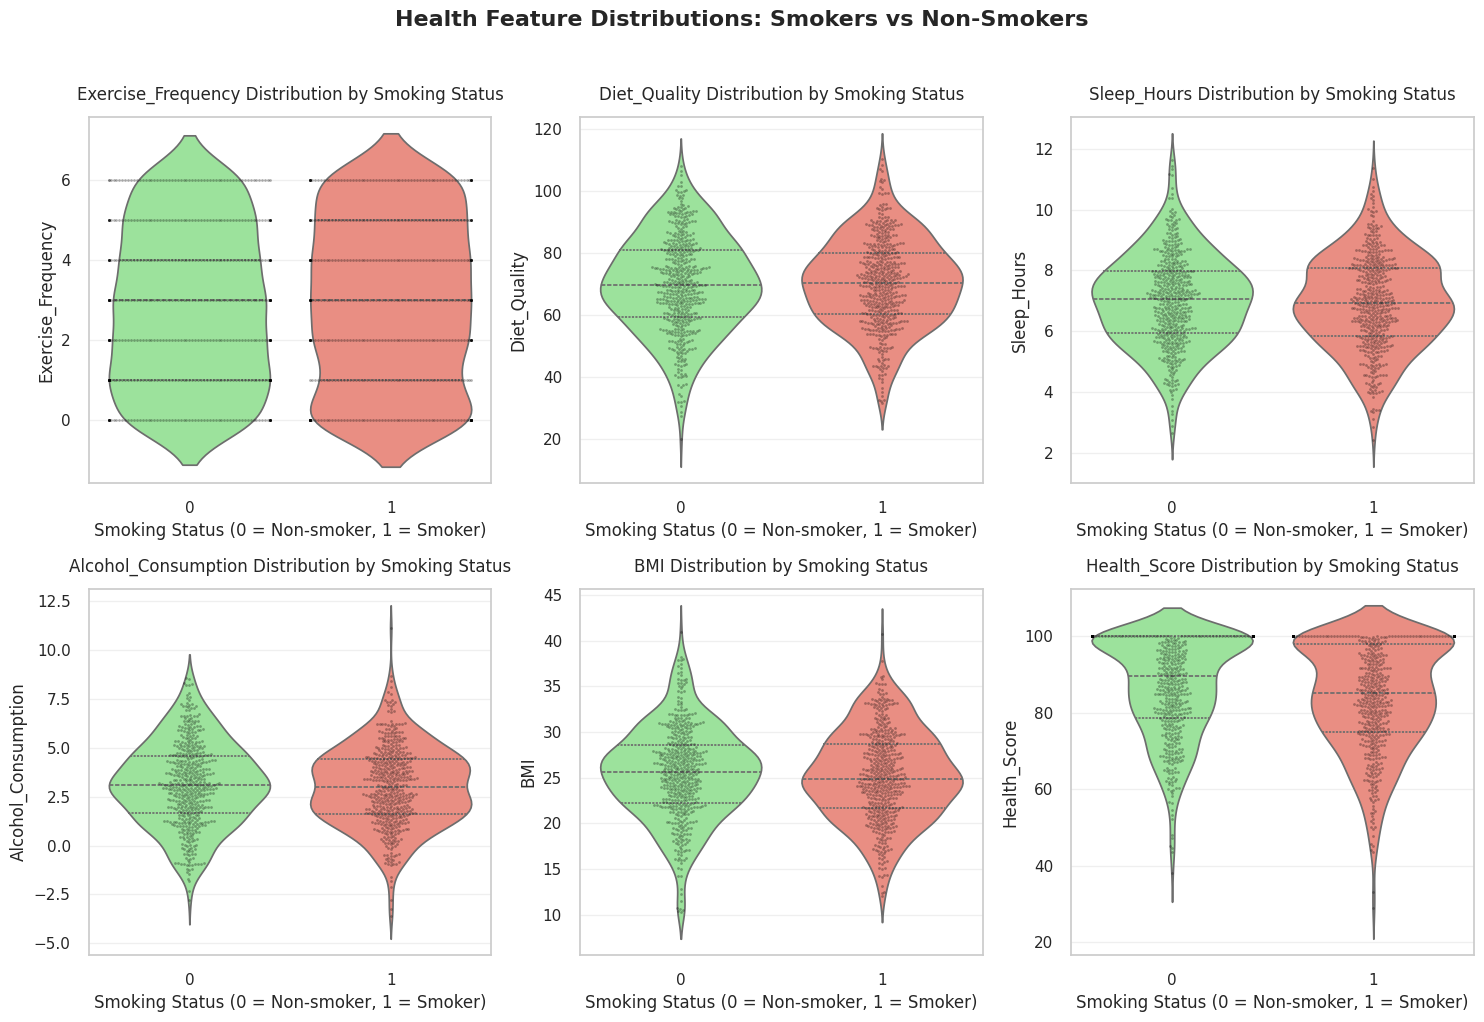

In [59]:
df['Smoking_Status'] = df['Smoking_Status'].astype(str)

plt.figure(figsize=(15, 10))

features_to_plot = ['Exercise_Frequency', 'Diet_Quality', 'Sleep_Hours',
                    'Alcohol_Consumption', 'BMI', 'Health_Score']

# Define the palette with string keys to match the Smoking_Status values
palette = {'0': 'lightgreen', '1': 'salmon'}

# Create violin plots with swarm overlay
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)

    sns.violinplot(data=df, x='Smoking_Status', y=feature,
                   palette=palette, inner='quartile')

    sns.swarmplot(data=df, x='Smoking_Status', y=feature,
                  color='black', alpha=0.3, size=2)

    plt.title(f'{feature} Distribution by Smoking Status', pad=12)
    plt.xlabel('Smoking Status (0 = Non-smoker, 1 = Smoker)')
    plt.ylabel(feature)
    plt.grid(axis='y', alpha=0.3)

plt.suptitle('Health Feature Distributions: Smokers vs Non-Smokers',
             y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()

plt.savefig("health_violin_plots.png", dpi=300, bbox_inches='tight')
plt.show()


In [64]:
from sklearn.preprocessing import LabelEncoder

# Define custom categories for age groups
age_bins = [0, 18, 30, 50, 70, 100]
age_labels = ['Teen', 'Young_Adult', 'Adult', 'Senior', 'Elder']
df['Age_Category'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)


In [65]:
# Encode the Age_Category column
le = LabelEncoder()
df['Age_Category_Encoded'] = le.fit_transform(df['Age_Category'])

In [66]:
# Save the updated dataset
df.to_csv('health_dataset.csv', index=False)